# The Euler method and how it can be refined

#### Second practical work, Monday,  October 5, 2020
In this second practical work, we introduce the *Euler method*. It is the most famous and simple numerical procedure for solving ordinary differential equations. We compare it to another numerical scheme, the so-called *midpoint method*, a little bit more tricky to implement but usually way more efficient. First, run the following cells to import the librairies used in this Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

### Exercise: computing the exponential function

We wish to numerically solve the following ordinary differential equation (ode), 

$$\frac{\mathrm{d} y}{\mathrm{d}t} = y(t),~~~~~~~y(0)=1,$$

for t ∈ [0, t<sub>max</sub>] with t<sub>max</sub>=10. In that case, we conveniently know the exact solution of this problem, y(t)=e<sup>t</sup>. To proceed, this ode is discretized in time with a timestep ∆t. In other words, we shall numerically compute the values y<sub>n</sub> of y(t) only at some specific values of t, denoted by t<sub>n</sub> = n ∆t. We compare two ways of computing the y<sub>n</sub>.

**The Euler method**. Starting with

$$\frac{\mathrm{d} y}{\mathrm{d}t}(t) \simeq \frac{y(t+\Delta t) - y(t)}{\Delta t} = \frac{y_{n+1}-y_n}{\Delta t}, $$

we get

$$ \frac{y_{n+1}-y_n}{\Delta t} \simeq y_n \Longrightarrow \boxed{y_{n+1} \simeq y_n (1+\Delta t)}$$

**The explicit midpoint method**. With the more accurate estimate

$$\frac{\mathrm{d} y}{\mathrm{d}t}\left( t + \frac{\Delta t}{2}\right) \simeq \frac{y(t+\Delta t) - y(t)}{\Delta t} = \frac{y_{n+1}-y_n}{\Delta t}, $$

we get

$$ \frac{y_{n+1}-y_n}{\Delta t}   \simeq  \frac{\mathrm{d} y}{\mathrm{d}t}\left( t + \frac{\Delta t}{2}\right) = y \left( t + \frac{\Delta t}{2}\right) \simeq y(t) + \frac{\Delta t}{2}  \frac{\mathrm{d} y}{\mathrm{d}t}(t) = y(t) + \frac{\Delta t}{2} y(t) = y_n +\frac{\Delta t}{2} y_n \Longrightarrow \boxed{y_{n+1} \simeq y_n \left(1+ \Delta t + \frac{(\Delta t)^2}{2} \right)} $$

Insert new cells below to answer the following questions.

1. Define a function `euler_step(Y_old,dt)` returning y<sub>n+1</sub> given y<sub>n</sub> and ∆t with the Euler method
2. Similarly, define `mp_step(Y_old,dt)` associated with the explicit midpoint method
3. Write a function `euler(dt,t_max)` that returns two arrays filled with the values of t<sub>n</sub> and y<sub>n</sub> computed with the Euler method
4. Similarly, define `mp(Y_old,dt)`
5. On a same graph, plot the exact solution of the ode and the numerical estimates based on the Euler and explicit midpoint methods for ∆t=0.25
6. We investigate the numerical error at the end of the simulation, 
$\varepsilon = \vert  y_\mathrm{N} - e^{t_N} \vert.$
   Compute this quantity for both methods and for ∆t ∈ [10<sup>-3</sup>,10<sup>-2</sup>,10<sup>-1</sup>], then plot them versus ∆t on a single log-log graph.
   *(Hint : use `plt.yscale('log')` to get a logarithmic scale on the y-axis)*
7. Show that one of these errors scales as ∆t, whereas the other scales as ∆t<sup>2</sup>. 


#### Question 1

In [2]:
# function returning yn+1 given yn and ∆t with the Euler method

def euler_step(Y_old, dt):
    Y_new = Y_old*(1 + dt)
    return Y_new

#### Question 2

In [3]:
# function returning yn+1 given yn and ∆t with the midpoint method

def mp_step(Y_old, dt):
    Y_new = Y_old*(1 + dt + (dt**2)/2)
    return Y_new

#### Question 3

In [4]:
# function that returns two arrays filled with the values of tn and yn with the Euler method

def euler(dt, t_max):
    t = 0
    y = 1
    t_e = np.array(t)
    y_e = np.array(y)
    while t < t_max:
        y = euler_step(y, dt)
        y_e = np.append(y_e, y)
        t  = t + dt
        t_e = np.append(t_e, t)
    return t_e, y_e


#### Question 4

In [5]:
# function that returns two arrays filled with the values of tn and yn with the Euler method

def mp(dt, t_max):
    t = 0
    y = 1
    t_mp = np.array(t)
    y_mp = np.array(y)
    while t < t_max:
        y = mp_step(y, dt)
        y_mp = np.append(y_mp, y)
        t = t + dt
        t_mp = np.append(t_mp, t)
    return t_mp, y_mp


#### Question 5


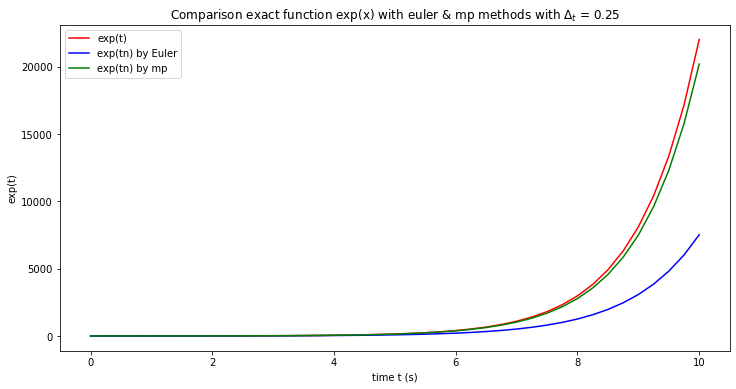

In [6]:
# Comparison discretization & exact formula

# Time variables
t_max = 10
dt    = 0.25

t_e, y_e   = euler(dt, t_max)
t_mp, y_mp = mp(dt, t_max)

# Vectors for exact function exp(x)
t = np.arange(0, t_max + dt, dt)
y = np.exp(t)

# Display results
plt.plot(t,    y,    'r', label = 'exp(t)')
plt.plot(t_e,  y_e,  'b', label = 'exp(tn) by Euler')
plt.plot(t_mp, y_mp, 'g', label = 'exp(tn) by mp')

plt.title('Comparison exact function exp(x) with euler & mp methods with $\Delta_t$ = 0.25')
plt.xlabel('time t (s)')
plt.ylabel('exp(t)')

plt.legend()

plt.show()
plt.close()

#### Question 6

In [7]:
# Function to display the result of this part
def display_error(dt, error_e, error_mp):
    """
    Function to display the result of the error calculation
    """
    plt.xscale('log')
    plt.yscale('log')
        
    plt.plot(dt, error_e,  'r-', label = 'Error Euler Method')
    plt.plot(dt, error_mp, 'b-', label = 'Error MP Method')

    plt.title('Error between Euler Method & Mp method with respect to exact solution')
    plt.xlabel('$\Delta t (s)$')
    plt.ylabel('$absolute error e$')

    plt.legend()
    
    plt.grid(True)
    plt.show()

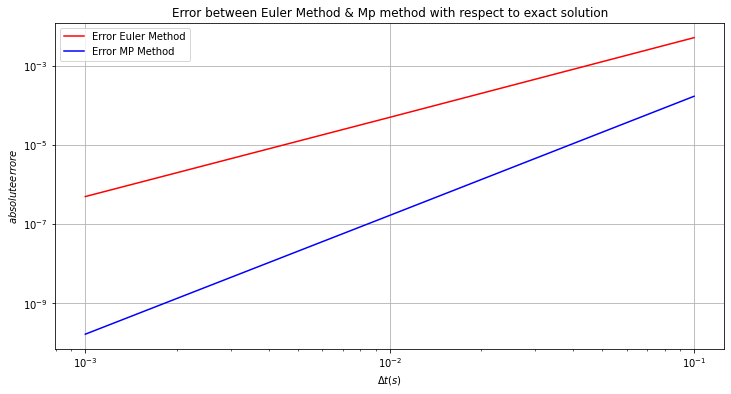

In [8]:
# 6 # Main code

# Time variables
t_max = 1
dt    = [10**-3, 10**-2, 10**-1]

# --------------------------------------------------------------------------

# Error calculation
error_e  = np.array([])
error_mp = np.array([])

for i in range(np.size(dt)) :
    [t_e, y_e]   = euler(dt[i], t_max)
    [t_mp, y_mp] = mp(dt[i], t_max)

    error_e   = np.append(error_e,   np.abs(y_e[1] - np.exp(t_e[1])))
    error_mp  = np.append(error_mp, np.abs(y_mp[1] - np.exp(t_mp[1])))

display_error(dt, error_e, error_mp)

#### Question 7

In [9]:
# quantification slope to verify that one method developps as dt^2 while the other developps at dt

# error_e  = C1 * dt^p1
# error_mp = C2 * dt^p2

"""
As we know than ne error will scale with dt and the other with dt^2, 
we will thereby have p1 or p2 = 2, and the other one = 1
"""

print(error_mp/error_e)


[0.00033331 0.00333055 0.03305372]


### Result

One can write the relation bounding the errors to the delta as :

$$ Error_{euler}  = C1 \times dt^{p1} ~~~~~~~~~ Error_{mp} = C2 \times dt^{p2} $$

Within a constant and with $dt = [10^{-3}, 10^{-2}, 10^{-1}]$, we see that the ratio $\frac{Error_{mp}}{Error_{euler}} = \frac{1}{3}\times dt$.

Therefore, by identification we get that $\frac{C2}{C1} = \frac{1}{3}$ and $p2 - p1 = dt$

Knowing that either p1 or p2 is 1 while the other is 2, we get that p1 = 1 & p2 = 2.

$$ Error_{euler}  = C1 \times dt^1 ~~~~~~~~~ Error_{mp} = C2 \times dt^2 $$

Finally, the MP methods developps as dt^2 while the euler method developps as dt, as one could have expected from previous graphs.

### Second test: the Euler method in mechanics

We consider the angle θ(t) of a pendulum subject to the following dynamics

$$\frac{\mathrm{d}^2 \theta}{\mathrm{d}t^2} + \omega_0^2 \sin(\theta) = 0, ~~~~ \theta(0) = \theta_0, ~~~~ \frac{\mathrm{d} \theta}{\mathrm{d}t}(0)=0.  $$

We want to numerically compute the solution of this second order differential equation with the Euler method, but this method deals with *first order* differential equations only. Thus, we turn the previous ode to a first order one by introducing the angular velocity Ω(t) as a new variable,

$$ \frac{\mathrm{d} \Omega}{\mathrm{d}t} + \omega_0^2\sin (\theta)=0, ~~~~~~~~  \Omega(t)=\frac{\mathrm{d} \theta}{\mathrm{d}t}, ~~~\theta(0) = \theta_0, ~~~~ \Omega(0)=0.$$


1. In a Markdown cell, write down θ<sub>n+1</sub> and Ω<sub>n+1</sub> as a function of θ<sub>n</sub>, Ω<sub>n</sub>, ∆t and ω<sub>0</sub>.

2. Write a function `euler_step(TH_old, OM_old, dt, omega0)` returning θ<sub>n+1</sub> and Ω<sub>n+1</sub> given θ<sub>n</sub>, Ω<sub>n</sub>, ∆t and ω<sub>0</sub>.

3.  Write a function `euler(TH_0, omega0, dt, t_max)` that returns three arrays filled with the values of t<sub>n</sub>, θ<sub>n</sub> and Ω<sub>n</sub> computed with the Euler method, given θ<sub>0</sub>, ω<sub>0</sub>, ∆t and t<sub>max</sub>.

4. For θ<sub>0</sub>=0.1, ω<sub>0</sub>=1, ∆t=0.1 and t<sub>max</sub>=100, plot θ(t) computed with the Euler method as a function of t. Add suitable axes name, legend, and title. What do you observe ? Does this change if ∆t is set to 0.01 ? For this problem, the Euler method is found to be *unconditionally unstable*.

5. We now turn to the explicit midpoint method, whose numerical scheme is given by
$$\theta_{n+1} = \theta_n + \Delta t \Omega_n - \frac{(\omega_0 \Delta t)^2}{2} \sin(\theta_n),~~~~~~~ \Omega_{n+1} = \Omega_n - \omega_0^2 \Delta t \sin \left( \theta_n + \frac{\Delta t \Omega_n}{2}\right).$$

   Similarly, define `mp_step(TH_old, OM_old, dt, omega0)` and `mp(TH_0, omega0, dt, t_max)`, then redo the plots of question 4 with this new scheme: what do you observe ?
   
6. Make a solver using the SCIPY function: scipy.integrate.solve_ivp. Compare results from q.4 and q.5. Make a comment.   
   
5. We investigate the frequency of θ(t) computed with the midpoint method, θ<sub>0</sub>=.1, ω<sub>0</sub>=1, ∆t=0.1 and t<sub>max</sub>=100.

    1. Import the scipy library using `import scipy.signal as spsig` then compute the power spectral density with `spsig.welch(x,fs, nperseg=len(x))` [(read the Scipy documentation for this function to know what should x and fs be given by)](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html)
    2. Plot the power spectral density.

6. 
    1. Extract from this figure the frequency f(θ<sub>0</sub>) and estimate the associated uncertainty df(θ<sub>0</sub>) on that measure.
    *(Hint : you may use the functions `np.max` and `np.argmax`)*
    2. Plot f(θ<sub>0</sub>) for twenty values θ<sub>0</sub> between 0.1 and 3. with error bars (use `plt.errorbar`). Add to this graph the theoretical prediction for small but finite θ<sub>0</sub>, 
    $$f(\theta_0) = \frac{\omega_0}{2\pi}\left( 1 - \frac{\theta_0^2}{16}\right) $$
    

#### Question 1

Using DL :

- $\Omega$ :

$$ \frac{\mathrm{d} \Omega}{\mathrm{d}t} = \frac{\Omega^{n+1} - \Omega^{n}}{\Delta_t} $$

and therefore :

$$ \Omega^{n+1} = \Omega^{n} - \Delta_t \omega_0^2 sin(\theta^{n}) $$

- $\theta$ :

$$ \frac{\mathrm{d} \theta}{\mathrm{d}t} = \Omega = \frac{\theta^{n+1} - \theta^{n}}{\Delta_t}$$

and so :

$$ \theta^{n+1} = \theta^{n} + \Delta_t\Omega^{n} $$


#### Question 2

In [10]:
# euler_step(TH_old, OM_old, dt, omega0) returning θn+1 and Ωn+1 given θn, Ωn, ∆t and ω0

def euler_step(TH_old, OM_old, dt, omega0):
    TH_new = TH_old + dt*OM_old
    OM_new = OM_old - (dt * omega0**2)*np.sin(TH_old)
    return TH_new, OM_new

#### Question 3

In [11]:
# euler(TH_0, omega0, dt, t_max) that returns three arrays filled with the values of tn, θn and Ωn computed with the Euler method, given θ0, ω0, ∆t and tmax

def euler(TH_0, omega0, dt, t_max):
    # Initial values
    #TH_0 already given
    t    = 0
    OM_0 = 0
    
    # variables to return
    tn   = np.array(t)
    TH_N = np.array(TH_0)
    OM_N = np.array(OM_0)
    
    # variables containing old value (scalar values)
    TH_old = TH_0
    OM_old = OM_0
    
    while t < t_max:  
        TH_old, OM_old = euler_step(TH_old, OM_old, dt, omega0)
        t = t + dt
        
        # loop
        tn  = np.append(tn, t)
        OM_N = np.append(OM_N, OM_old)
        TH_N = np.append(TH_N, TH_old)        
    return tn, TH_N, OM_N

#### Question 4

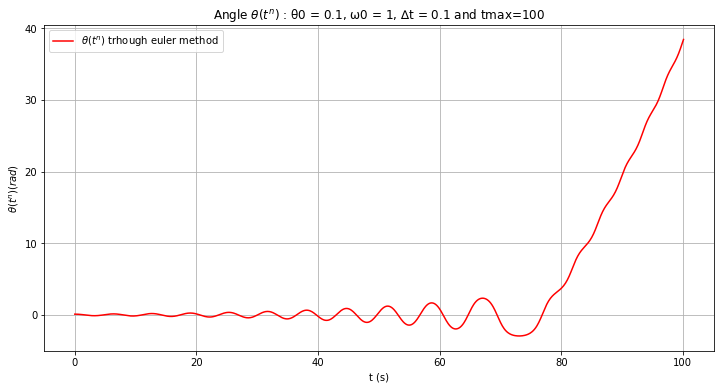

In [12]:
# data # θ0 = 0.1, ω0=1, ∆t=0.1 and tmax=100
TH_0   = 0.1
omega0 = 1
dt     = 0.1
t_max  = 100

tn, TH_N, OM_N = euler(TH_0, omega0, dt, t_max)

plt.plot(tn, TH_N, 'r-', label = r'$\theta (t^n)$ trhough euler method') 

plt.title(r'Angle $θ(t^n)$ : θ0 = {}, ω0 = {}, ∆t = {} and tmax={}'.format(TH_0, omega0, dt, t_max))
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()


- We observe a sinusoidale oscillation getting destructive.

- Let's try with $\Delta_t = 0.01$ :

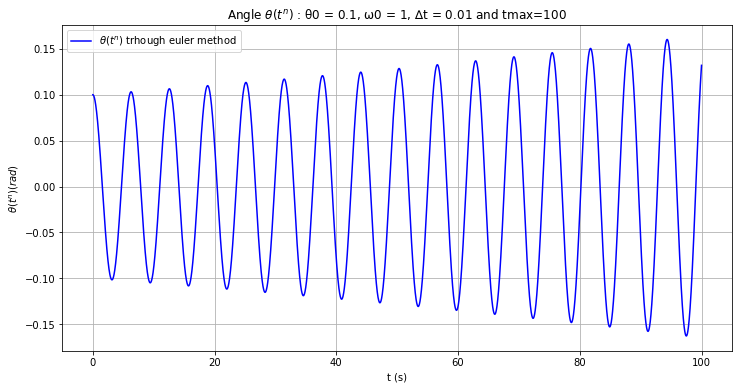

In [13]:
# data
TH_0   = 0.1
omega0 = 1
dt     = 0.01
t_max  = 100

tn, TH_N, OM_N = euler(TH_0, omega0, dt, t_max)

plt.plot(tn, TH_N, 'b-', label = r'$\theta (t^n)$ trhough euler method') 

plt.title(r'Angle $θ(t^n)$ : θ0 = {}, ω0 = {}, ∆t = {} and tmax={}'.format(TH_0, omega0, dt, t_max))
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()

We visually see that the $\Delta_t$ has influences over the destructive behavior. Thus, bigger the $\Delta_t$, fewer the destructive behavior.

Basically, it looks like bigger the $\Delta_t$ is, bigger is the influence of the sinus term.

Anyway, no matter what $\Delta_t$ we take, the Euler method "is found to be unconditionally unstable".

#### Question 5 - explicit midpoint method

In [14]:
# mp_step(TH_old, OM_old, dt, omega0) returning θn+1 and Ωn+1 given θn, Ωn, ∆t and ω0

def mp_step(TH_old, OM_old, dt, omega0):
    TH_new = TH_old + dt*OM_old - ((dt * omega0)**2)*np.sin(TH_old)/2
    OM_new = OM_old - (dt * omega0**2)*np.sin(TH_old + dt*OM_old/2)
    return TH_new, OM_new


In [15]:
# mp(TH_0, omega0, dt, t_max) returns three arrays filled with the values of tn, θn and Ωn 
# computed with the Mp method, given θ0, ω0, ∆t and tmax

def mp(TH_0, omega0, dt, t_max):
    # Initial values
    #TH_0 already given
    t    = 0
    OM_0 = 0
    
    # variables to return
    tn   = np.array(t)
    TH_N = np.array(TH_0)
    OM_N = np.array(OM_0)
    
    # variables containing old value (scalar values)
    TH_old = TH_0
    OM_old = OM_0
    
    while t < t_max:  
        TH_old, OM_old = mp_step(TH_old, OM_old, dt, omega0)
        t = t + dt
        
        # loop
        tn  = np.append(tn, t)
        OM_N = np.append(OM_N, OM_old)
        TH_N = np.append(TH_N, TH_old)        
    return tn, TH_N, OM_N

Redoing Q4 plots

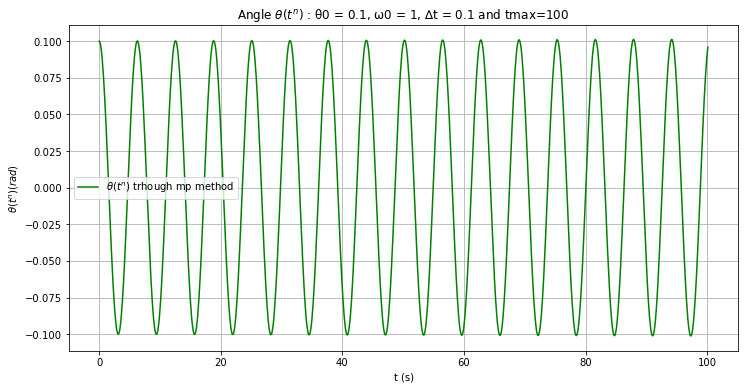

In [16]:
# data # θ0 = 0.1, ω0=1, ∆t=0.1 and tmax=100
TH_0   = 0.1
omega0 = 1
dt     = 0.1
t_max  = 100

tn, TH_N, OM_N = mp(TH_0, omega0, dt, t_max)

plt.plot(tn, TH_N, 'g-', label = r'$\theta (t^n)$ trhough mp method') 

plt.title(r'Angle $θ(t^n)$ : θ0 = {}, ω0 = {}, ∆t = {} and tmax={}'.format(TH_0, omega0, dt, t_max))
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()

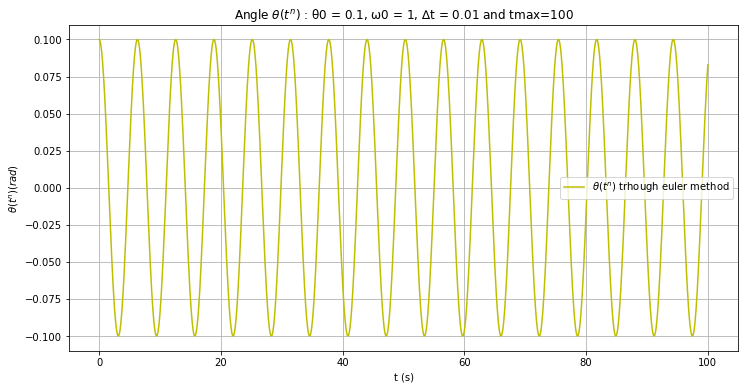

In [17]:
# data
TH_0   = 0.1
omega0 = 1
dt     = 0.01
t_max  = 100

tn, TH_N, OM_N = mp(TH_0, omega0, dt, t_max)

plt.plot(tn, TH_N, 'y-', label = r'$\theta (t^n)$ trhough euler method') 

plt.title(r'Angle $θ(t^n)$ : θ0 = {}, ω0 = {}, ∆t = {} and tmax={}'.format(TH_0, omega0, dt, t_max))
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()

We see that this method is much more stable than was the euler one, for both $\Delta_t$.


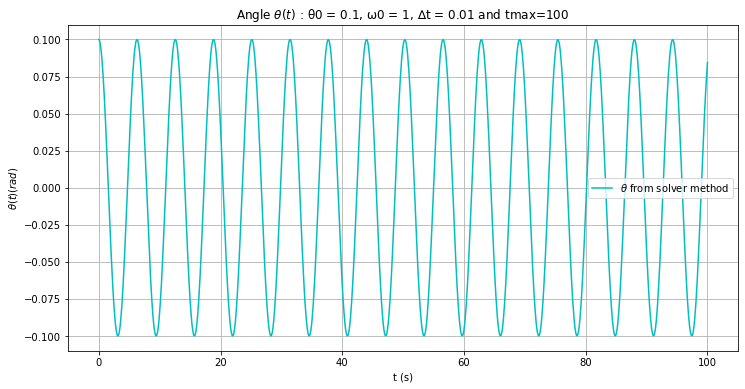

In [18]:
# scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
# t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

import scipy.integrate

# data
t_span = (0, t_max) # time over which we integrate

r0 = TH_0, OM_0 = (0.1, 0)

omega0 = 1
t_max  = 100

t = np.linspace(0, t_max, 10**3)

def f(t, r):
    TH, OM = r
    f1 = OM
    f2 = -(omega0**2)*np.sin(TH)
    return f1, f2

# ---------------------------------------------------------------

# solution
sol = scipy.integrate.solve_ivp(f, t_span, r0, method='RK45', t_eval=t)

TH, OM = sol.y   # Solution in angle (theta, omega)
t = sol.t        # associated time vector

# ---------------------------------------------------------------

# display  results
plt.plot(t, TH, 'c-', label = r'$\theta$ from solver method') 

plt.title(r'Angle $θ(t)$ : θ0 = {}, ω0 = {}, ∆t = {} and tmax={}'.format(TH_0, omega0, dt, t_max))
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()


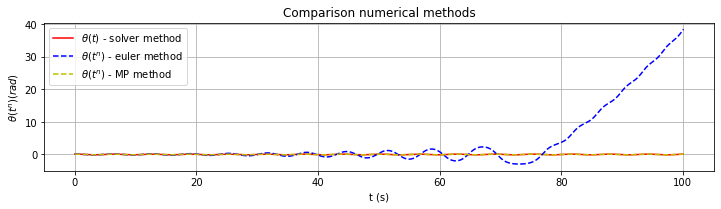

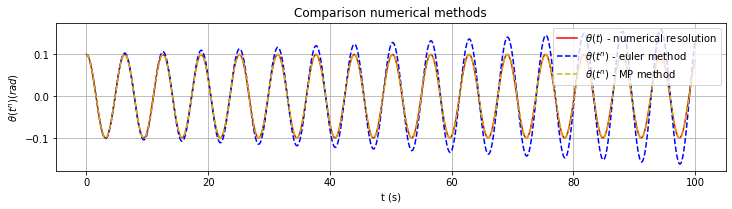

In [19]:
# comparing results

# data
TH_0   = 0.1
omega0 = 1
dt     = [0.1, 0.01, 10**-3]
t_max  = 100



# dt = 0.1
# apporx 1 - Euler
t_e, TH_e, OM_e    = euler(TH_0, omega0, dt[0], t_max)

# apporx 2 - Midpoint
t_mp, TH_mp, OM_mp = mp(TH_0, omega0, dt[0], t_max)

plt.subplot(2,1,1)
plt.plot(t,   TH,  'r-', label = r'$\theta (t)$ - solver method') 
plt.plot(t_e,  TH_e,  'b--', label = r'$\theta (t^n)$ - euler method') 
plt.plot(t_mp, TH_mp, 'y--', label = r'$\theta (t^n)$ - MP method') 

plt.title(r'Comparison numerical methods')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()



# dt = 0.01
# apporx 1 - Euler
t_e, TH_e, OM_e    = euler(TH_0, omega0, dt[1], t_max)

# apporx 2 - Midpoint
t_mp, TH_mp, OM_mp = mp(TH_0, omega0, dt[1], t_max)

plt.subplot(2,1,2)
plt.plot(t,   TH,  'r-', label = r'$\theta (t)$ - numerical resolution') 
plt.plot(t_e,  TH_e,  'b--', label = r'$\theta (t^n)$ - euler method') 
plt.plot(t_mp, TH_mp, 'y--', label = r'$\theta (t^n)$ - MP method')  

plt.title(r'Comparison numerical methods')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t^n) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()

The first pack of graph shows that the solver solution isn't destructive, as the euler method was for $\Delta = 0.1$.

On the other hand for $\Delta = 0.01$, we see that the solver is again close to the midpoint scheme, and so she as well doesn't present a destructive behavior.

To get more indsight on the difference between euler and solver methods, we are now about to plot the difference between these methods : 

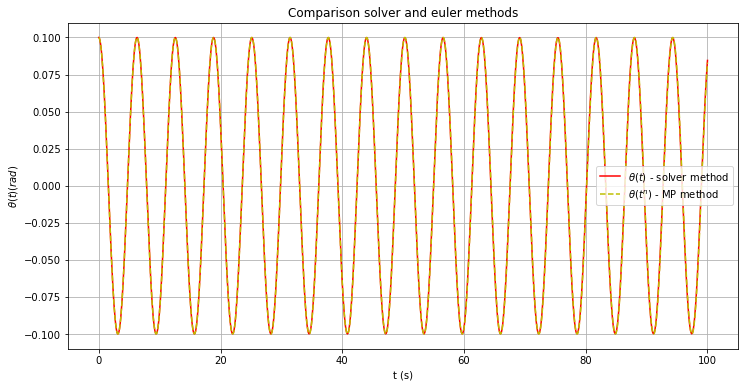

In [20]:
plt.plot(t,   TH,  'r-', label = r'$\theta (t)$ - solver method') 
plt.plot(t_mp, TH_mp, 'y--', label = r'$\theta (t^n)$ - MP method')  

plt.title(r'Comparison solver and euler methods')
plt.xlabel('t (s)')
plt.ylabel(r'$\theta (t) (rad)$')

plt.legend()
    
plt.grid(True)
plt.show()

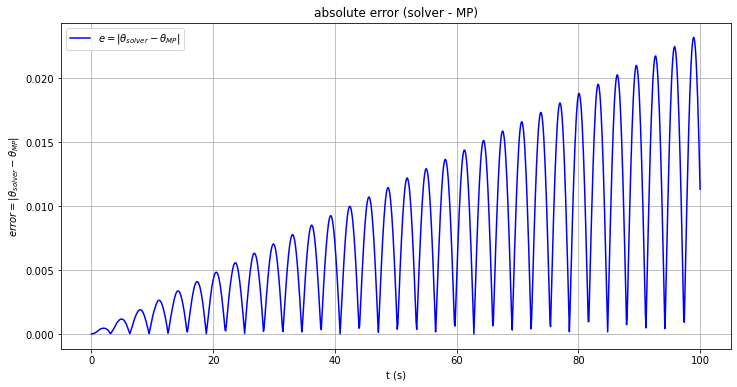

In [21]:
t = np.linspace(0, t_max, 10**3+2)

def f(t, r):
    TH, OM = r
    f1 = OM
    f2 = -(omega0**2)*np.sin(TH)
    return f1, f2

# ---------------------------------------------------------------

# solution
sol = scipy.integrate.solve_ivp(f, t_span, r0, method='RK45', t_eval=t)

TH, OM = sol.y   # Solution in angle (theta, omega)
t = sol.t        # associated time vector

t_mp, TH_mp, OM_mp = mp(TH_0, omega0, dt[0], t_max)

# display absolute error
plt.plot(t, abs(TH - TH_mp), 'b-', label = r'$e = |\theta_{solver} - \theta_{MP}|$')

plt.title(r'absolute error (solver - MP)')
plt.xlabel('t (s)')
plt.ylabel(r'$error = |\theta_{solver} - \theta_{MP}| $')

plt.legend()
    
plt.grid(True)
plt.show()

It appears clearly that the solver method works well (looking at the value for the absolute difference), and is more precise for lower value of time (looking at its shape increasing over time).

Overall, it looks like the solver method might become uncertain at long term, even if the scale of error stays quiet low.

On the following graph, we have an idea of the relative error, considering the solver method as the reference one :

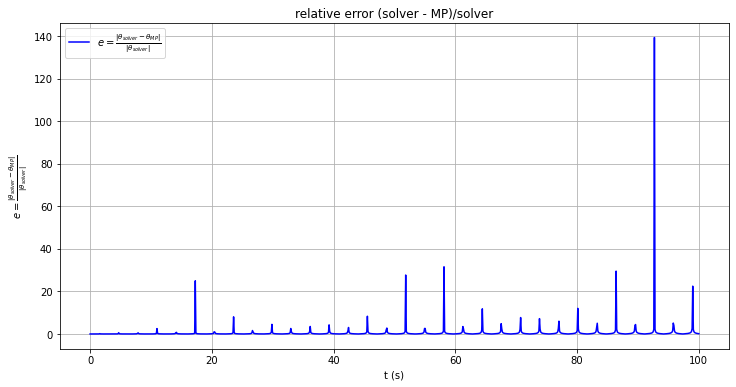

In [22]:
plt.plot(t, abs(TH - TH_mp)/np.abs(TH), 'b-', label = r'$e = \frac{|\theta_{solver} - \theta_{MP}|}{|\theta_{solver}|} $')

plt.title(r'relative error (solver - MP)/solver')
plt.xlabel('t (s)')
plt.ylabel(r'$e = \frac{|\theta_{solver} - \theta_{MP}|}{|\theta_{solver}|} $')

plt.legend()
    
plt.grid(True)
plt.show()

### Conclusion
It becomes evident that the solver presents a few discontinuities for the considered pb. Even if increasing the number of point might reduce this, the amount of calcul would be to great (already $10^5$ points considered here).

Besides these, the method once again looks reliable for lower time. We must do a compromise between stability, precision and speed of execussion.

#### 7 - A & B

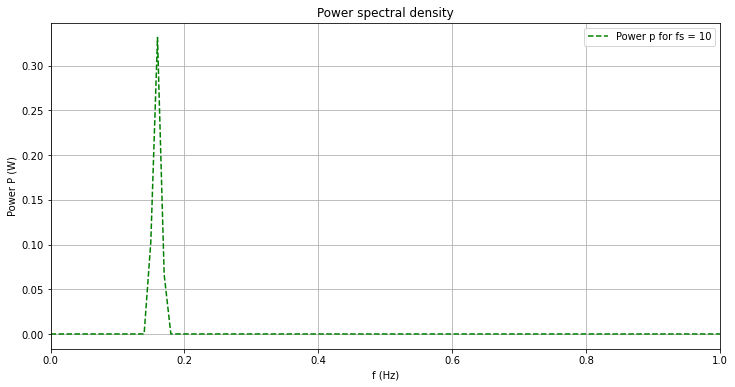

In [23]:
# A
import scipy.signal as spsig 

TH, OM = sol.y
t      = sol.t

dt = 0.1
fs = int(1/dt) # sample frequency
x = TH

f, P_spec_density = spsig.welch(x, fs, nperseg=len(x), scaling='density') # TH being the solver's solution

plt.plot(f, P_spec_density, 'g--', label = 'Power p for fs = {}'.format(fs))

plt.title(r'Power spectral density')
plt.xlabel('f (Hz)')
plt.ylabel('Power P (W)')

plt.xlim(0,1)
plt.legend()

plt.grid(True)
plt.show()

#### 8 - A & B

2. Plot f(θ<sub>0</sub>) for twenty values θ<sub>0</sub> between 0.1 and 3. with error bars (use `plt.errorbar`). Add to this graph the theoretical prediction for small but finite θ<sub>0</sub>, 
$$f(\theta_0) = \frac{\omega_0}{2\pi}\left( 1 - \frac{\theta_0^2}{16}\right) $$

The frequency $f(\theta_0)$ is the frequency at which we observe the bump in the power above (natural frequency).

In [24]:
# position where the mas P takes place
index = np.argmax(P_spec_density)

# natural frequency
f_0 = f[index]
f_reasonance = omega0/(2*np.pi)

df0 = np.abs(f_reasonance - f_0)

print("df0 = {}".format(df0))

df0 = 0.0005256956306595451


Here we calculate $f(\theta_0) = 0.159$ and so $df_0 = |\frac{\omega_0}{2\pi} - f(\theta_0)| \approx 0.05$ Hz

In [25]:
from scipy.integrate import solve_ivp

f_0 = np.array([])
theta_0 = np.linspace(0.1, 3, 20)

for i in theta_0:
    t_span = (0, t_max) # time over which we integrate

    r0  = (i, 0)  # Initial conditions
    
    sol = scipy.integrate.solve_ivp(f, t_span, r0, t_eval=t)    
    TH, OM = sol.y
    t      = sol.t

    f, P_spec_density = spsig.welch(x, fs, nperseg=len(x), scaling='density') # TH being the solver's solution
    
    f_0 = np.append(f_0, f[np.argmax(P_spec_density)])


f_0_8 = omega0/(2*np.pi)*(1 - (theta_0/4)**2)

plt.plot(theta_0, f_0_8, 'g')
plt.plot(theta_0, f_0, 'b')
plt.tilte("bonjour")
plt.errorbar(theta_0, f_0_8, df0, fmt = 'none',ecolor = 'red',label='Error')

TypeError: 'numpy.ndarray' object is not callable